# **Predictive Modeling of Cardiovascular Disease Using Supervised Machine Learning Classifiers**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# **Read the Dataset**

In [2]:
heart_data = pd.read_csv("heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **Preliminary Analysis**

## **1. Determine Missing Values**

In [3]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **2. Descriptive Summary**

In [4]:
heart_data.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


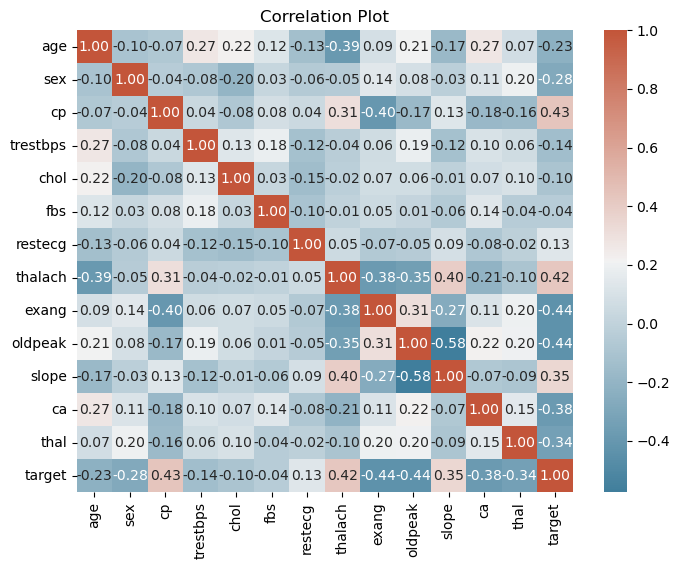

In [5]:
plt.figure(figsize=(8, 6))

corr_matrix = heart_data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap)
plt.title("Correlation Plot")
plt.show()

# **3. ML Modelings** 

## **1. Train-Test Split**

In [6]:
# Assuming 'data' is your DataFrame and 'target' is your target column
X = heart_data.drop('target', axis=1)
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size: ", X_train.shape[0])
print("Test set size: ", X_test.shape[0])

Training set size:  820
Test set size:  205


## **2. Feature Scalling**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **3. Logistic Regression**

In [12]:
logistic_regression             = LogisticRegression()
logistic_regression_model       = logistic_regression.fit(X_train, y_train)

In [13]:
logistic_regression_prediction  = logistic_regression_model.predict(X_test)

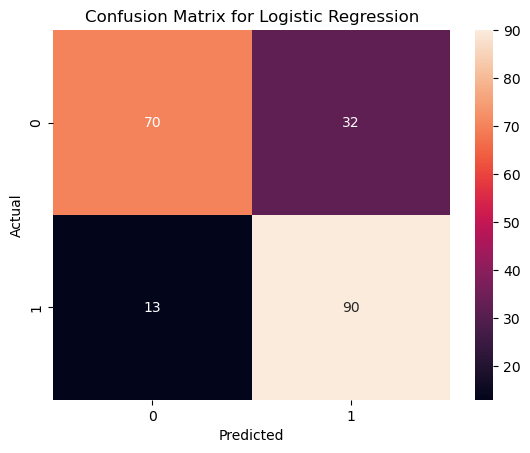

In [14]:
confusionMatrix_lr = confusion_matrix(y_test,logistic_regression_prediction)

sns.heatmap(confusionMatrix_lr, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
LogisticRegression_Accuracy = accuracy_score(y_test, logistic_regression_prediction)
print("Accuracy for Logistic Regression:", LogisticRegression_Accuracy)

LogisticRegression_Precision = precision_score(y_test, logistic_regression_prediction)
print("\nPrecision for Logistic Regression:", LogisticRegression_Precision)

LogisticRegression_Recall = recall_score(y_test, logistic_regression_prediction)
print("\nRecall for Logistic Regression:", LogisticRegression_Recall)

LogisticRegression_F1_score = f1_score(y_test, logistic_regression_prediction)
print("\nF1-score for Logistic Regression:", LogisticRegression_F1_score)

Accuracy for Logistic Regression: 0.7804878048780488

Precision for Logistic Regression: 0.7377049180327869

Recall for Logistic Regression: 0.8737864077669902

F1-score for Logistic Regression: 0.7999999999999999


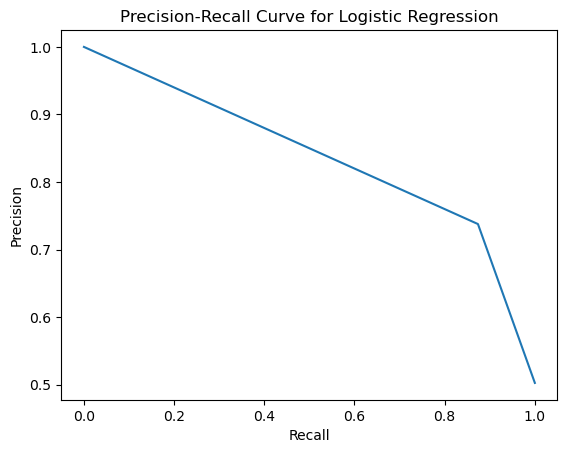

In [18]:
precision, recall, _ = precision_recall_curve(y_test, logistic_regression_prediction)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()

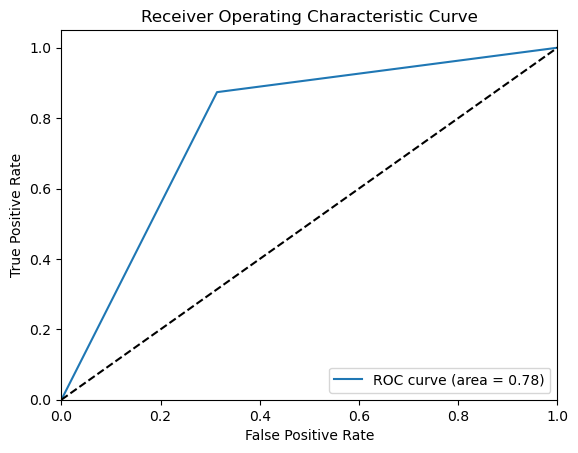

In [20]:
fpr, tpr, _ = roc_curve(y_test, logistic_regression_prediction)
roc_auc = roc_auc_score(y_test, logistic_regression_prediction)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

## **4. KNN Classifier**

In [21]:
knn_Classifier = KNeighborsClassifier(n_neighbors = 5)
knn_Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn_Classifier_Prediction = knn_Classifier.predict(X_test)

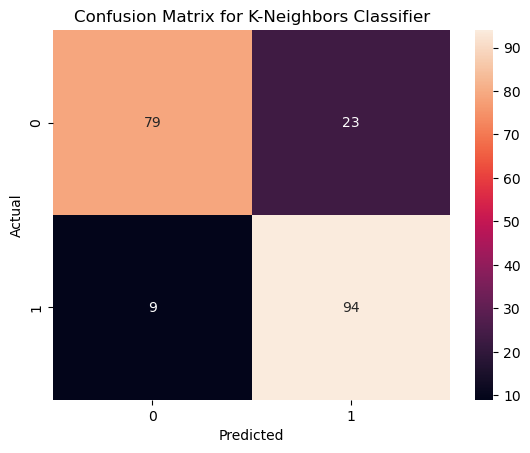

In [23]:
confusionMatrix_knn = confusion_matrix(y_test,knn_Classifier_Prediction)

sns.heatmap(confusionMatrix_knn, annot=True, fmt='d')
plt.title('Confusion Matrix for K-Neighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
KNNClassifier_Accuracy = accuracy_score(y_test, knn_Classifier_Prediction)
print("Accuracy for K-Neighbors Classifier:", KNNClassifier_Accuracy)

KNNClassifier_Precision = precision_score(y_test, knn_Classifier_Prediction)
print("\nPrecision for K-Neighbors Classifier:", KNNClassifier_Precision)

KNNClassifier_Recall = recall_score(y_test, knn_Classifier_Prediction)
print("\nRecall for K-Neighbors Classifier:", KNNClassifier_Recall)

KNNClassifier_F1_score = f1_score(y_test, knn_Classifier_Prediction)
print("\nF1-score for K-Neighbors Classifier:", KNNClassifier_F1_score)

Accuracy for K-Neighbors Classifier: 0.8439024390243902

Precision for K-Neighbors Classifier: 0.8034188034188035

Recall for K-Neighbors Classifier: 0.912621359223301

F1-score for K-Neighbors Classifier: 0.8545454545454545


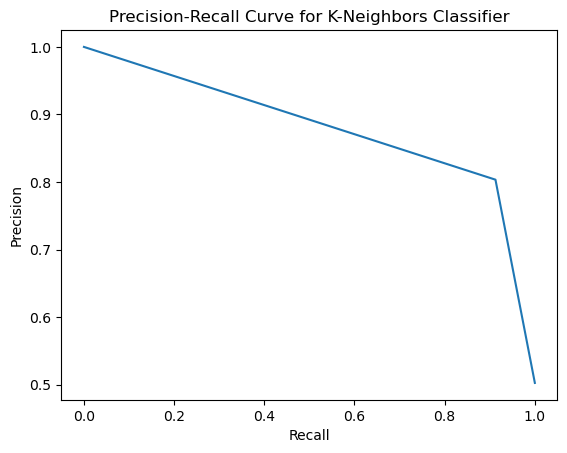

In [25]:
precision, recall, _ = precision_recall_curve(y_test, knn_Classifier_Prediction)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for K-Neighbors Classifier')
plt.show()

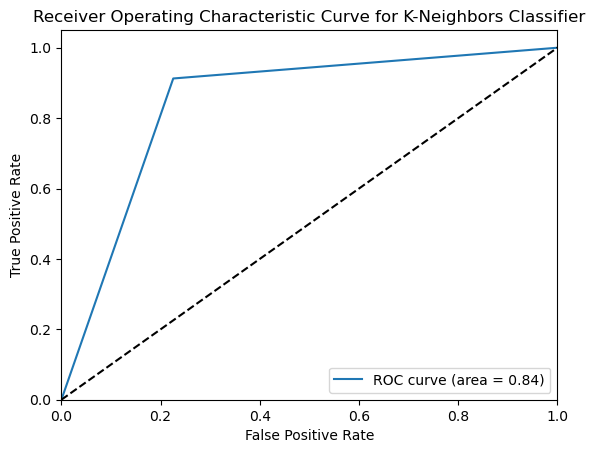

In [26]:
fpr, tpr, _ = roc_curve(y_test, knn_Classifier_Prediction)
roc_auc = roc_auc_score(y_test, knn_Classifier_Prediction)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for K-Neighbors Classifier')
plt.legend(loc="lower right")
plt.show()

## **5. Random Forest Classifier**

In [27]:
randomForestClassifier = RandomForestClassifier(n_estimators=300, 
                                                 random_state=42,
                                                 max_depth=5)
randomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

In [28]:
randomForest_Prediction = randomForestClassifier.predict(X_test)

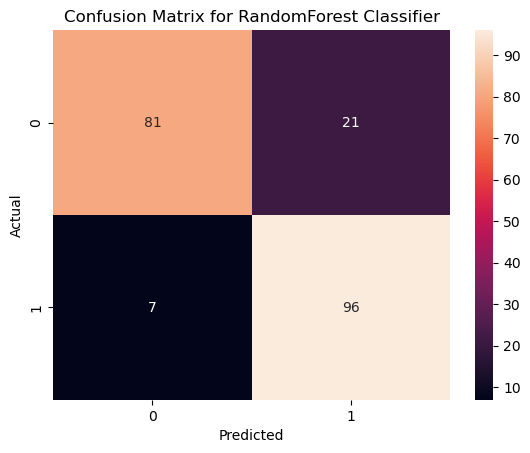

In [29]:
confusionMatrix_rf = confusion_matrix(y_test,randomForest_Prediction)

sns.heatmap(confusionMatrix_rf, annot=True, fmt='d')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
randomForest_Accuracy = accuracy_score(y_test, randomForest_Prediction)
print("Accuracy for RandomForest Classifier:", randomForest_Accuracy)

randomForest_Precision = precision_score(y_test, randomForest_Prediction)
print("\nPrecision for RandomForest Classifier:", randomForest_Precision)

randomForest_Recall = recall_score(y_test, randomForest_Prediction)
print("\nRecall for RandomForest Classifier:", randomForest_Recall)

randomForest_F1_score = f1_score(y_test, randomForest_Prediction)
print("\nF1-score for RandomForest Classifier:", randomForest_F1_score)

Accuracy for RandomForest Classifier: 0.8634146341463415

Precision for RandomForest Classifier: 0.8205128205128205

Recall for RandomForest Classifier: 0.9320388349514563

F1-score for RandomForest Classifier: 0.8727272727272728


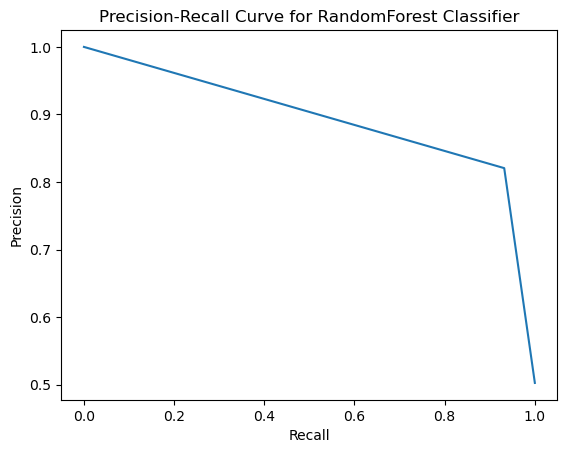

In [31]:
precision, recall, _ = precision_recall_curve(y_test, randomForest_Prediction)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest Classifier')
plt.show()

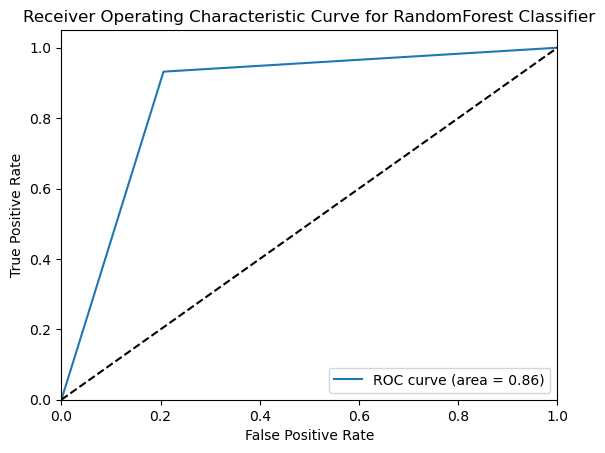

In [32]:
fpr, tpr, _ = roc_curve(y_test, randomForest_Prediction)
roc_auc = roc_auc_score(y_test, randomForest_Prediction)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for RandomForest Classifier')
plt.legend(loc="lower right")
plt.show()

## **6. Support Vector Machine (SVM)**

In [33]:
supportVectorMachine =  SVC(C=2)
supportVectorMachine.fit(X_train, y_train)

SVC(C=2)

In [34]:
SVM_Predicitons = supportVectorMachine.predict(X_test)

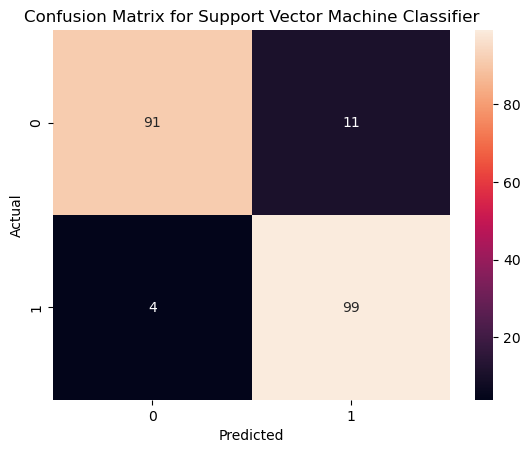

In [36]:
confusionMatrix_SVM = confusion_matrix(y_test,
                                       SVM_Predicitons)

sns.heatmap(confusionMatrix_SVM, 
            annot=True,
            fmt='d')

plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
SVM_Accuracy = accuracy_score(y_test, SVM_Predicitons)
print("Accuracy for Support Vector Machine Classifier:", SVM_Accuracy)

SVM_Precision = precision_score(y_test, SVM_Predicitons)
print("\nPrecision for Support Vector Machine Classifier:", SVM_Precision)

SVM_Recall = recall_score(y_test, SVM_Predicitons)
print("\nRecall for Support Vector Machine Classifier:", SVM_Recall)

SVM_F1_score = f1_score(y_test, SVM_Predicitons)
print("\nF1-score for Support Vector Machine Classifier:", SVM_F1_score)

Accuracy for Support Vector Machine Classifier: 0.926829268292683

Precision for Support Vector Machine Classifier: 0.9

Recall for Support Vector Machine Classifier: 0.9611650485436893

F1-score for Support Vector Machine Classifier: 0.9295774647887324


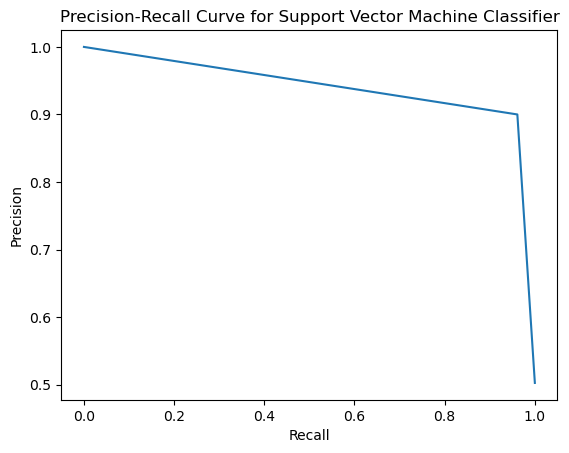

In [38]:
precision, recall, _ = precision_recall_curve(y_test, SVM_Predicitons)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine Classifier')
plt.show()

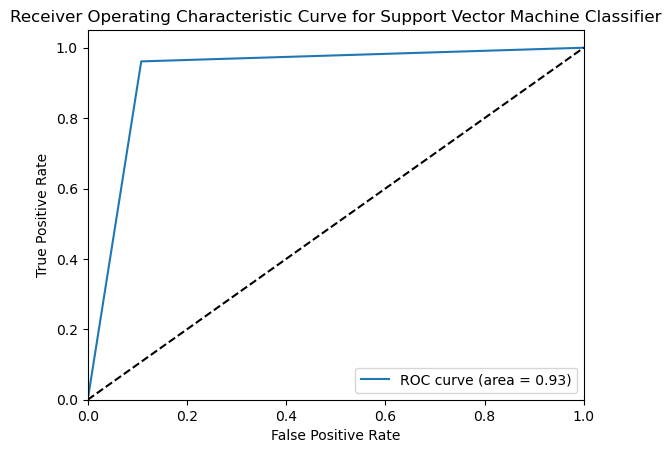

In [39]:
fpr, tpr, _ = roc_curve(y_test, SVM_Predicitons)
roc_auc = roc_auc_score(y_test, SVM_Predicitons)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Support Vector Machine Classifier')
plt.legend(loc="lower right")
plt.show()

## **7. Extreme Gradient Boosting (XG Boost)**

In [8]:
xgbClassifier = XGBClassifier(learning_rate=0.05, 
                              n_estimators=100,
                              max_depth=15)
xgbClassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [9]:
xgbClassifier_Prediction = xgbClassifier.predict(X_test)

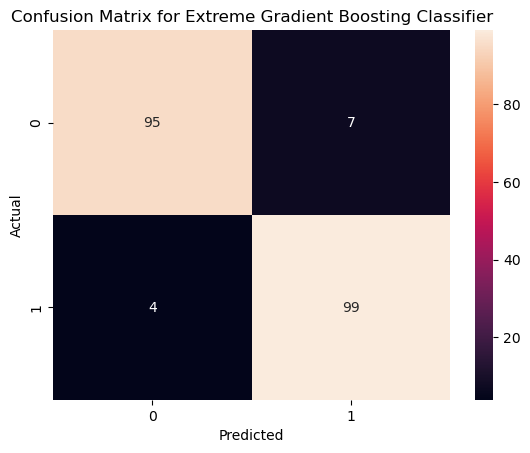

In [10]:
confusionMatrix_XGB = confusion_matrix(y_test,
                                       xgbClassifier_Prediction)

sns.heatmap(confusionMatrix_XGB, 
            annot=True,
            fmt='d')

plt.title('Confusion Matrix for Extreme Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
XGB_Accuracy = accuracy_score(y_test, xgbClassifier_Prediction)
print("Accuracy for Extreme Gradient Boosting Classifier:", XGB_Accuracy)

XGB_Precision = precision_score(y_test, xgbClassifier_Prediction)
print("\nPrecision for Extreme Gradient Boosting Classifier:", XGB_Precision)

XGB_Recall = recall_score(y_test, xgbClassifier_Prediction)
print("\nRecall for Extreme Gradient Boosting Classifier:", XGB_Recall)

XGB_F1_score = f1_score(y_test, xgbClassifier_Prediction)
print("\nF1-score for Extreme Gradient Boosting Classifier:", XGB_F1_score)

Accuracy for Extreme Gradient Boosting Classifier: 0.9463414634146341

Precision for Extreme Gradient Boosting Classifier: 0.9339622641509434

Recall for Extreme Gradient Boosting Classifier: 0.9611650485436893

F1-score for Extreme Gradient Boosting Classifier: 0.9473684210526316


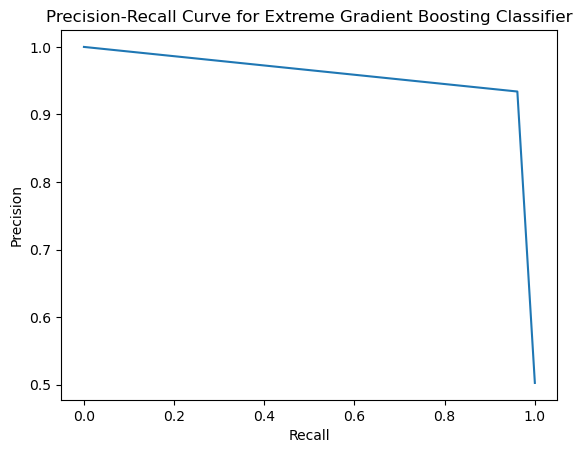

In [12]:
precision, recall, _ = precision_recall_curve(y_test, xgbClassifier_Prediction)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Extreme Gradient Boosting Classifier')
plt.show()

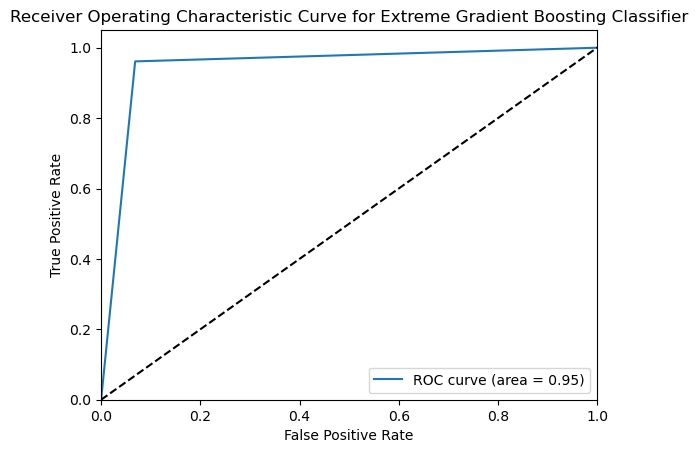

In [13]:
fpr, tpr, _ = roc_curve(y_test, xgbClassifier_Prediction)
roc_auc = roc_auc_score(y_test, xgbClassifier_Prediction)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Extreme Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

# **Model Comparison**

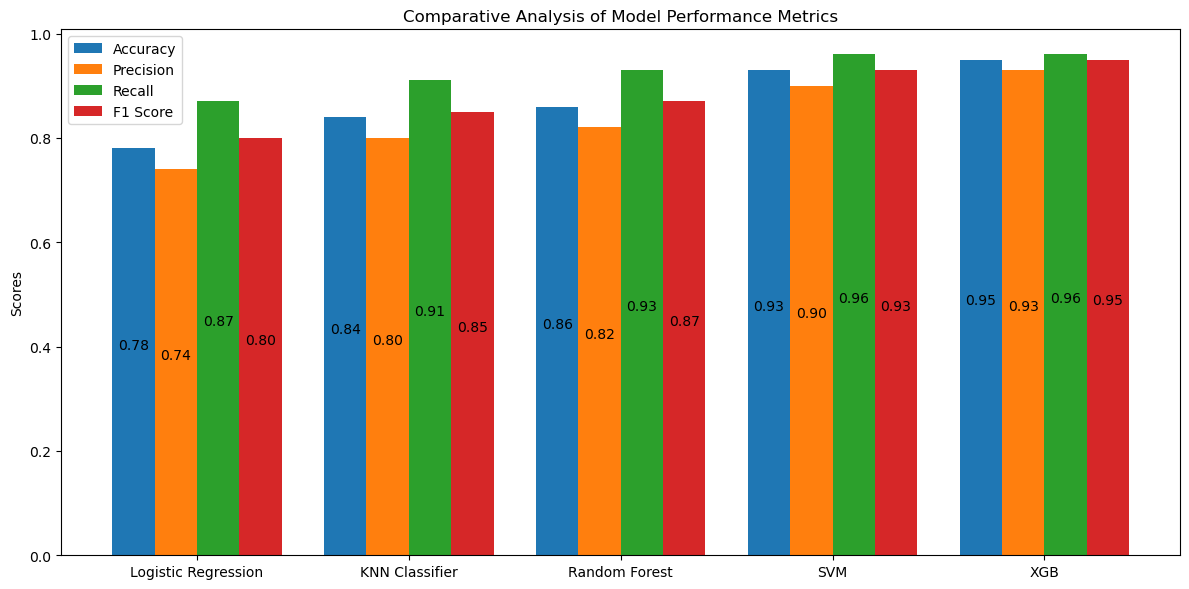

In [49]:
models = ['Logistic Regression', 'KNN Classifier', 'Random Forest', 'SVM', 'XGB']
accuracy = [round(LogisticRegression_Accuracy, 2), round(KNNClassifier_Accuracy, 2), round(randomForest_Accuracy, 2), round(SVM_Accuracy, 2), round(XGB_Accuracy, 2)]
precision = [round(LogisticRegression_Precision, 2), round(KNNClassifier_Precision, 2), round(randomForest_Precision, 2), round(SVM_Precision, 2), round(XGB_Precision, 2)]
recall = [round(LogisticRegression_Recall, 2), round(KNNClassifier_Recall, 2), round(randomForest_Recall, 2), round(SVM_Recall, 2), round(XGB_Recall, 2)]
f1_score = [round(LogisticRegression_F1_score, 2), round(KNNClassifier_F1_score, 2), round(randomForest_F1_score, 2), round(SVM_F1_score, 2), round(XGB_F1_score, 2)]

x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(12, 6))  
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score')

# Function to attach a text label inside each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height/2,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_ylabel('Scores')
ax.set_title('Comparative Analysis of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

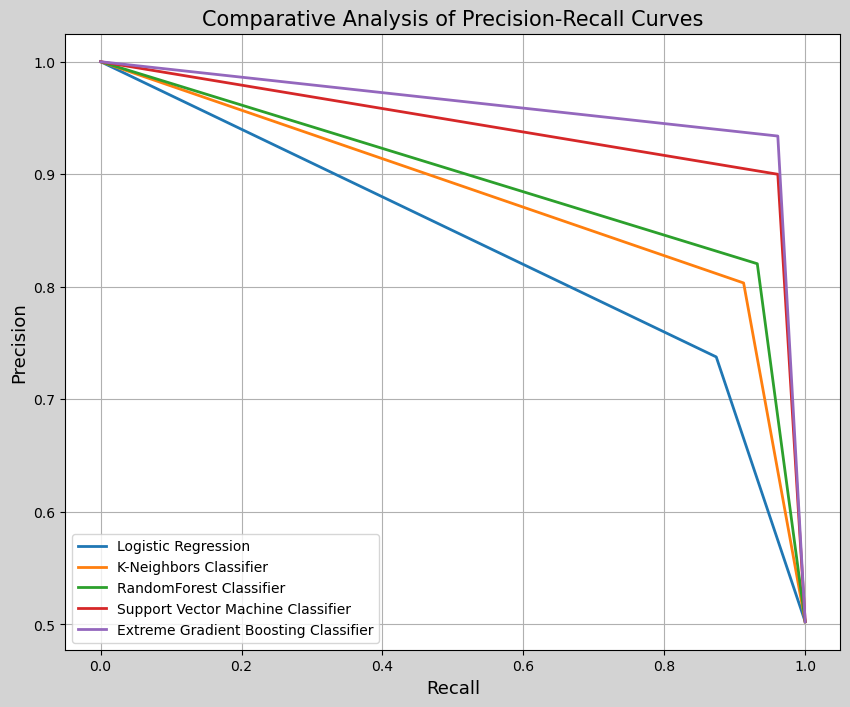

In [53]:
precision_lr, recall_lr, _   = precision_recall_curve(y_test, logistic_regression_prediction)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_Classifier_Prediction)
precision_rf, recall_rf, _   = precision_recall_curve(y_test, randomForest_Prediction)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, SVM_Predicitons)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgbClassifier_Prediction)

plt.figure(figsize=(10, 8), facecolor='lightgrey') 
plt.plot(recall_lr, precision_lr, label='Logistic Regression', linewidth=2)
plt.plot(recall_knn, precision_knn, label='K-Neighbors Classifier', linewidth=2)
plt.plot(recall_rf, precision_rf, label='RandomForest Classifier', linewidth=2)
plt.plot(recall_svm, precision_svm, label='Support Vector Machine Classifier', linewidth=2)
plt.plot(recall_xgb, precision_xgb, label='Extreme Gradient Boosting Classifier', linewidth=2)

plt.xlabel('Recall', fontsize=13)
plt.ylabel('Precision', fontsize=13)
plt.title('Comparative Analysis of Precision-Recall Curves', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

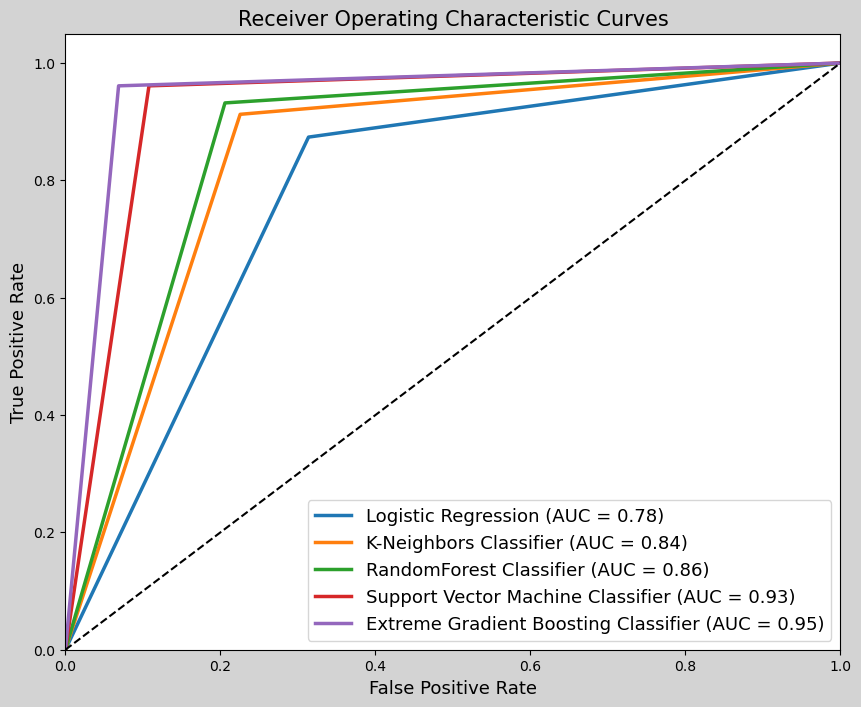

In [55]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_prediction)
roc_auc_lr = roc_auc_score(y_test, logistic_regression_prediction)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_Classifier_Prediction)
roc_auc_knn = roc_auc_score(y_test, knn_Classifier_Prediction)

fpr_rf, tpr_rf, _ = roc_curve(y_test, randomForest_Prediction)
roc_auc_rf = roc_auc_score(y_test, randomForest_Prediction)

fpr_svm, tpr_svm, _ = roc_curve(y_test, SVM_Predicitons)
roc_auc_svm = roc_auc_score(y_test, SVM_Predicitons)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgbClassifier_Prediction)
roc_auc_xgb = roc_auc_score(y_test, xgbClassifier_Prediction)

plt.figure(figsize=(10, 8), facecolor='lightgrey')  # Customize the background color here
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr, linewidth=2.5)
plt.plot(fpr_knn, tpr_knn, label='K-Neighbors Classifier (AUC = %0.2f)' % roc_auc_knn, linewidth=2.5)
plt.plot(fpr_rf, tpr_rf, label='RandomForest Classifier (AUC = %0.2f)' % roc_auc_rf, linewidth=2.5)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine Classifier (AUC = %0.2f)' % roc_auc_svm, linewidth=2.5)
plt.plot(fpr_xgb, tpr_xgb, label='Extreme Gradient Boosting Classifier (AUC = %0.2f)' % roc_auc_xgb, linewidth=2.5)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic Curves', fontsize=15)
plt.legend(loc="lower right", fontsize=13)
plt.show()

# **Feature Importnace**

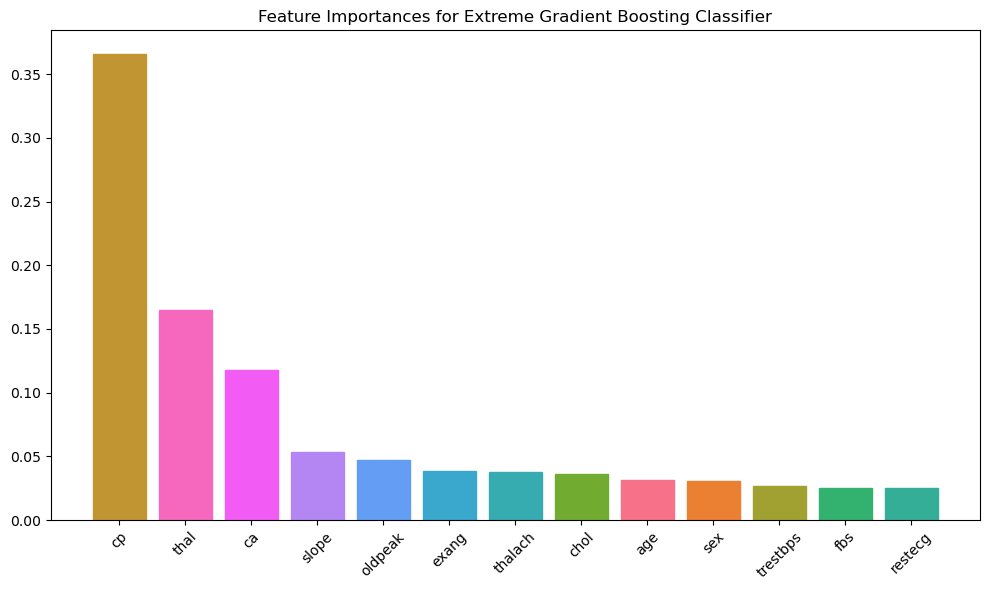

In [14]:
# Get feature importances
feature_importances = xgbClassifier.feature_importances_

# Sort feature importances in descending order and get the corresponding feature names
sorted_idx = feature_importances.argsort()[::-1]
feature_names = X.columns.tolist()  # Replace with your own feature names

# Define a custom color palette using Seaborn
n_colors = len(feature_names)
custom_palette = sns.color_palette("husl", n_colors=n_colors)

# Create a dictionary that maps feature names to colors
feature_colors = {feature_names[i]: custom_palette[i] for i in range(n_colors)}

# Plot feature importances with the custom color palette
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Extreme Gradient Boosting Classifier")
bars = plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
for i, bar in enumerate(bars):
    feature_name = feature_names[sorted_idx[i]]
    color = feature_colors.get(feature_name, 'k')  # Default to black ('k') if color is not specified
    bar.set_color(color)
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.tight_layout()
plt.show()

In [18]:
range(len(feature_importances)), [feature_names[i] for i in sorted_idx]

(range(0, 13),
 ['cp',
  'thal',
  'ca',
  'slope',
  'oldpeak',
  'exang',
  'thalach',
  'chol',
  'age',
  'sex',
  'trestbps',
  'fbs',
  'restecg'])